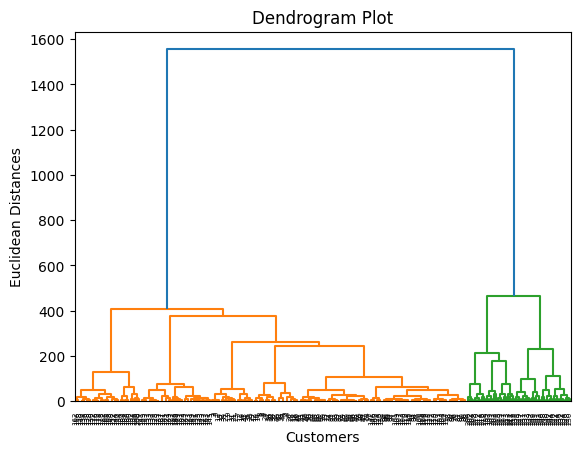

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


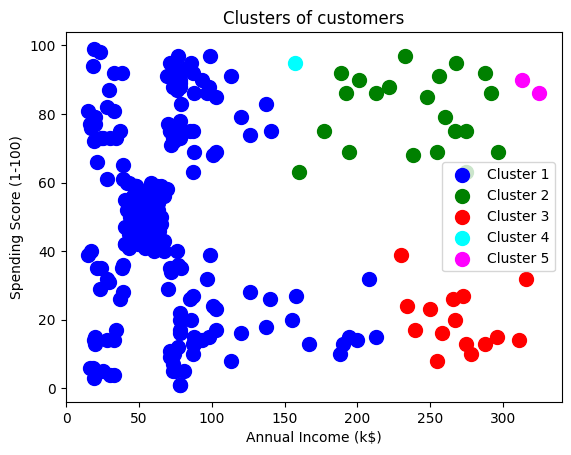

In [1]:
# Agglomerative clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasetMall_Customers_data.csv
dataset = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

# Finding the optimal number of clusters using the dendrogram
import scipy.cluster.hierarchy as shc

# Assuming 'x' is your data matrix, you should define it as follows:
x = dataset.iloc[:, [3, 4]].values  # Example: Selecting columns 3 (Annual Income) and 4 (Spending Score)

dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()


# Step-3: Training the hierarchical clustering model
# Training the hierarchical model on the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
y_pred = hc.fit_predict(x)

# Visualizing the clusters

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


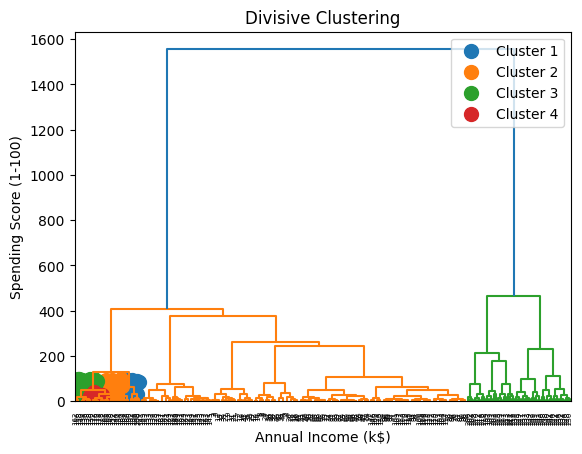

In [2]:
# Divisive clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Importing the dataset (can be found in kaggle)
dataset = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

# Assuming 'x' is your data matrix, you should define it as follows:
x = dataset.iloc[:, [3, 4]].values  # Example: Selecting columns 3 (Annual Income) and 4 (Spending Score)

# Create a dendrogram to determine the optimal number of clusters for divisive clustering
dendro = shc.dendrogram(shc.linkage(x, method="ward"))

# Determine the number of clusters based on the dendrogram
num_clusters = 5  # You can choose the number of clusters based on the dendrogram

# Perform divisive clustering by recursively applying agglomerative clustering
def divisive_clustering(data, num_clusters):
    if num_clusters == 1:
        return [data]
    else:
        # Create an AgglomerativeClustering model
        hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        cluster_labels = hc.fit_predict(data)

        # Split the data into two clusters
        cluster1 = data[cluster_labels == 0]
        cluster2 = data[cluster_labels == 1]

        # Recursively apply divisive clustering to each subcluster
        clusters = []
        clusters.extend(divisive_clustering(cluster1, num_clusters // 2))
        clusters.extend(divisive_clustering(cluster2, num_clusters // 2))

        return clusters

# Perform divisive clustering
clusters = divisive_clustering(x, num_clusters)

# Visualize the clusters (This part depends on the specific visualization you want)
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=100, label=f'Cluster {i + 1}')

plt.title('Divisive Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
